In [5]:
library(datasets)
library(GGally)
library(scatterplot3d)

Datos
En el presente tutorial se utilizará la base de datos trees de la librería datasets que contiene información del diámetro, altura y volumen de una muestra de árboles de cerezo.

Para comenzar es importante observar la relación entre las variables. Recordemos que para este propósito podemos utilizar métodos gráficos y el coeficiente de correlación de cada par de variables. La función cor nos permite calcular el coeficiente de correlación, para facilitar la observación de los datos utilizaremos la función round que permite redondear los decimales al número de dígitos que se le indique.

In [6]:
round(cor(x = trees, method = "pearson"), digits = 3)

,Girth,Height,Volume
Girth,1.000,0.519,0.967
Height,0.519,1.000,0.598
Volume,0.967,0.598,1.000


Por otro lado, la función ggpairs permite ver a la vez diagramas de dispersión, el coeficiente de correlación y la distribución de cada variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


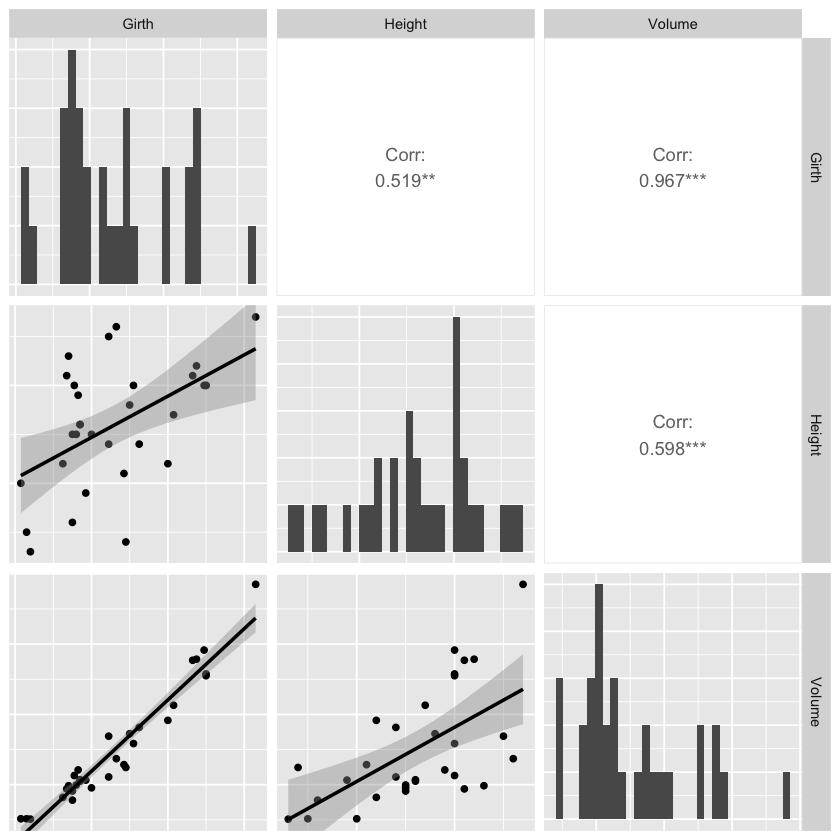

In [7]:
ggpairs(trees, lower = list(continuous = "smooth"),
        diag = list(continuous = "barDiag"), axisLabels = "none")

Estimación del modelo
Para estimar un modelo de la forma:

ŷ =β̂ 0+β̂ 1x1+...+β̂ kxk+ϵ

La función lm permite ajustar modelos lineales y requiere 2 argumentos: (1) formula que corresponde a una descripción del modelo que se quiere ajustar, debe tener la forma y~x y (2) data un data frame que contenga las variables que se utilizarán en el modelo.

Adicionalmente, la función summary al recibir un modelo estimado como argumento retorna: (1) información de los residuos; (2) los valores estimados y desviación estándar, el estadístico t y el p-valor de la prueba de significancia individual de cada coeficiente;(3) la desviación estándar del error; (4) el coeficiente de determinación o R2
, el coeficiente de determinación ajustado; (5) el estadístico F y el p-valor de la prueba de significancia global.



In [9]:
modelo<-lm(Volume~Girth+Height,data=trees)
summary(modelo)


Call:
lm(formula = Volume ~ Girth + Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


Para cada coeficiente:

Intercepto:

Valor t: -6.713
p-valor: 2.75e-07
Comparación: 2.75e-07 < 0.05, por lo que se rechaza H0.
Girth:

Valor t: 17.816
p-valor: < 2e-16
Comparación: < 2e-16 < 0.05, por lo que se rechaza H0.
Height:

Valor t: 2.607
p-valor: 0.0145
Comparación: 0.0145 < 0.05, por lo que se rechaza H0.

En este ejemplo, los p-valores para el intercepto, Girth y Height son todos menores que el nivel de significancia de 0.05. Esto significa que todos los coeficientes son significativamente diferentes de cero, y por lo tanto, rechazamos la hipótesis nula para cada uno de estos coeficientes.
Por lo tanto, ambos predictores, Girth y Height, son significativos en el modelo de regresión para predecir el volumen de los árboles.

Para observar el modelo ajustado vamos a utilizar la función scatterplot3d que permite graficar una nube de puntos en 3 dimensiones, en el siguiente enlace https://cran.r-project.org/web/packages/scatterplot3d/scatterplot3d.pdf se pueden observar las múltiples opciones de personalización con las que se puede ajustar. Por otro lado, la función plane3d permite agregar un plano a la gráfica creada previamente, como se puede ver a continuación:

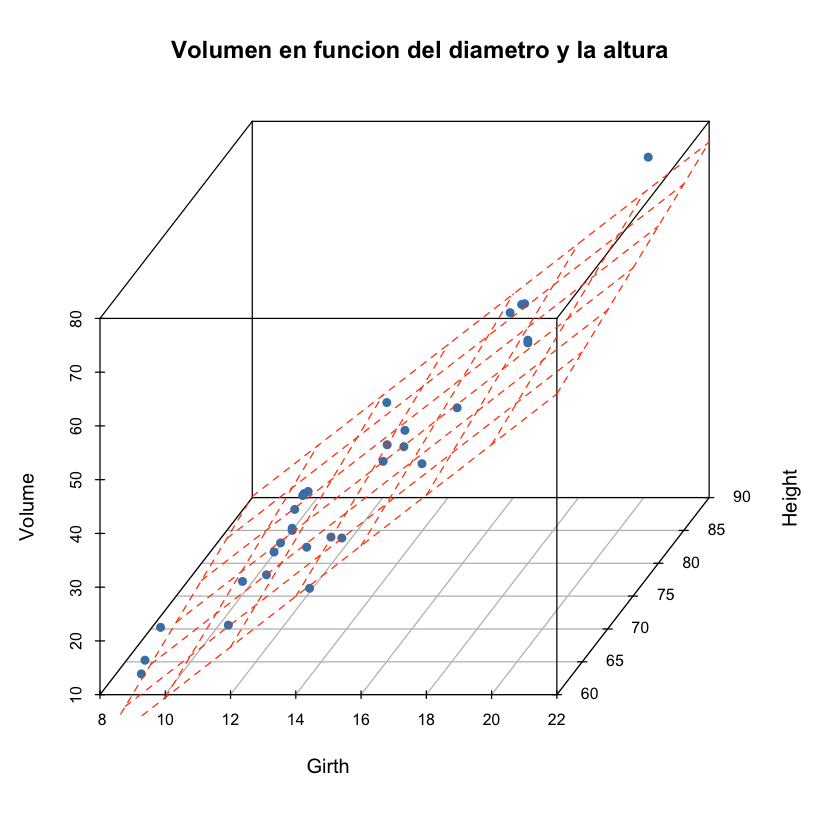

In [16]:
# Gráfico de dispersión
p <- scatterplot3d(trees, angle=55, #ángulo entre el eje x y y
                   type='p', #carácter que indica el tipo de gráfico
                   pch=16, #forma del punto
                   color = "steelblue", #color de los puntos
                   main = 'Volumen en funcion del diametro y la altura') 

# Plano del modelo ajustado
p$plane3d(modelo, col='orangered')

Ajuste del modelo
La significancia global del modelo se analiza a través de la siguiente hipótesis:

H0:β1=β2=...=βk=0vsH1:almenosunβj≠0

Ya que en la hipótesis nula todos los βj
 son igual a cero - con excepción del intercepto β0
 - se puede decir que se considera el siguiente modelo:

H0:Yi=β0+ϵi

Por el contrario, el modelo que se considera en la hipótesis alterna contempla la inclusión de todos los βj
. Para el caso que estamos analizando el modelo es el siguiente:

H1:Yi=β0+β1X1i+β2X2i+ϵi

Teniendo en cuenta lo anterior, la función anova permite comparar el modelo que corresponde a la hipótesis nula con el que corresponde a la hipótesis alterna. Se utiliza de la siguiente forma:



In [17]:
null_model = lm(Volume ~ 1, data = trees) #Modelo de la hipótesis nula

anova(null_model, modelo)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,8106.0839,NA,NA,NA,NA
2,28,421.9214,2,7684.163,254.9723,1.071238e-18


Esto nos muestra que con el p-valor asociado al estadístico F se puede decir que el modelo completo es globalmente significativo. Adicionalmente, podemos ver que el p-valor obtenido en esta prueba coincide con el obtenido previamente con la función summary.

Inferencias sobre los parámetros de regresión
Previamente con la función summary se pudo observar los resultados de las pruebas de significancia global del modelo y la significancia individual de cada coeficiente. Por otro lado, la función confint permite la construcción de intervalos de confianza para los coeficientes:



In [18]:
confint(modelo)

,2.5 %,97.5 %
(Intercept),-75.68226247,-40.2930554
Girth,4.16683899,5.2494820
Height,0.07264863,0.6058538


Adicionalmente, el argumento level permite establecer el nivel de confianza que tendrá el intervalo.



In [21]:
confint(modelo,level = 0.90)


,5 %,95 %
(Intercept),-72.682412,-43.2929057
Girth,4.258612,5.1577092
Height,0.117847,0.5606554


Predicción de nuevos valores
Uno de los propósitos al construir un modelo puede ser el predecir el valor de la variable de respuesta a partir de nueva información, para este fin se puede utilizar la función predict que recibe como argumentos el modelo estimado y los nuevos datos. Para este caso utilizaremos la función sample para crear una nueva muestra a partir de los datos iniciales.

In [29]:
set.seed(123)
datos_nuevos <- trees[sample(nrow(trees),size=40,replace = TRUE),]
predict(modelo, datos_nuevos)

31        15        19        14         3        10        18        22 
68.515305 23.954110 30.600978 20.506154  4.816981 20.187581 33.806482 36.008319 
       11         5        20      14.1      22.1        25        26        27 
22.015402 19.869008 28.697035 20.506154 36.008319 44.877702 50.942868 52.223751 
      5.1      19.1      27.1      25.1        28      25.2         9        29 
19.869008 30.600978 52.223751 44.877702 53.428513 44.877702 21.413021 53.899329 
      3.1         8      26.1         7      10.1       9.1        30      19.2 
 4.816981 19.245949 50.942868 16.192688 20.187581 21.413021 53.899329 30.600978 
        4      14.2        17      11.1       7.1        21        12      15.1 
15.874115 20.506154 31.583966 22.015402 16.192688 34.388184 21.468465 23.954110

Para los nuevos datos y su ajuste al modelo podemos graficarlos nuevamente:

Code

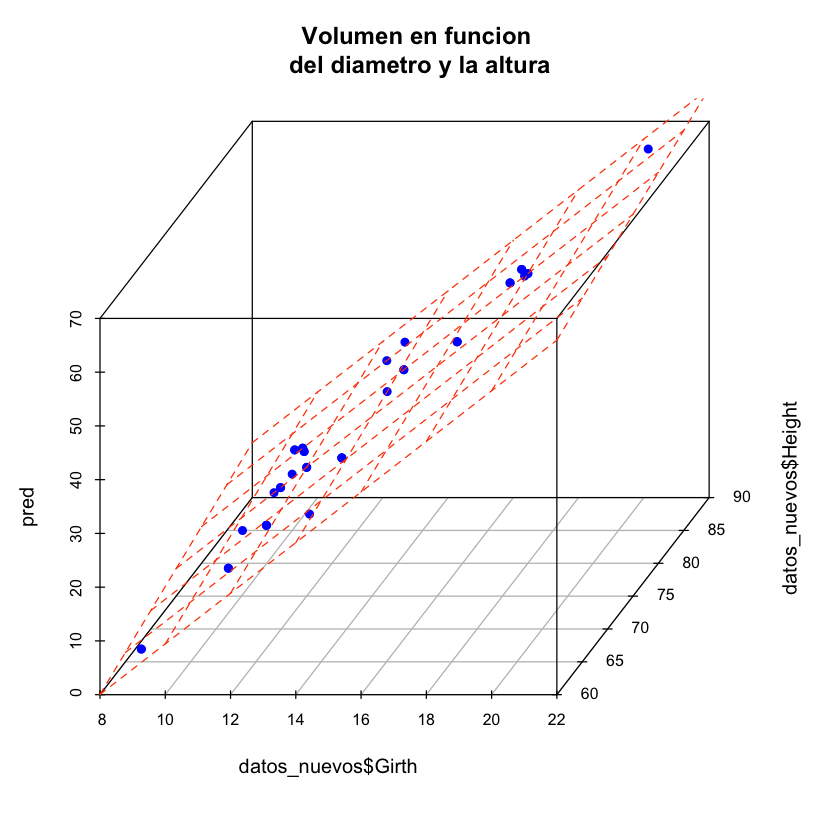

In [30]:
# Nuevos datos
set.seed(123)
datos_nuevos <- trees[sample(nrow(trees),size=40,replace = TRUE),]
pred<-predict(modelo, datos_nuevos)

# Gráfico de dispersión
p <- scatterplot3d(x=datos_nuevos$Girth,y=datos_nuevos$Height,z=pred, angle=55, 
                   type='p', pch=16, color = "blue",
                   main = 'Volumen en funcion \ndel diametro y la altura')

# Plano del modelo ajustado
p$plane3d(modelo, col='orangered')

También puede ser de interés realizar intervalos de predicción para nuevos valores para esto podemos utilizar nuevamente la función predict agregando el argumento interval="predict"

In [31]:
predict(modelo, newdata=data.frame(Girth=10.7, Height=82), interval="predict")


,fit,lwr,upr
1,20.20826,11.72176,28.69476


Por otro lado, si se requiere realizar intervalos de confianza para valores específicos podemos utilizar de forma similar la función predict con el argumento interval="confidence"



In [32]:
predict(modelo, newdata=data.frame(Girth=10.7, Height=82), interval="confidence")


,fit,lwr,upr
1,20.20826,17.24294,23.17358
